###CLASSIFIER A

Label counts for Classifier A:
  Class 0 (Prompt collapse): 90 samples
  Class 1 (Other): 287 samples

Classifier A (Validation Set):
Accuracy: 0.9605, MCC: 0.8901


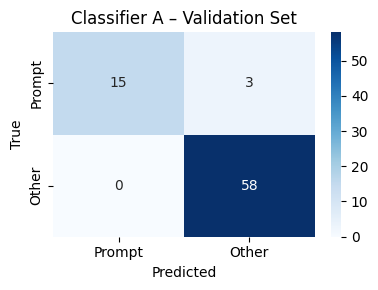


Classifier A (Total Set):
Accuracy: 0.9920, MCC: 0.9781


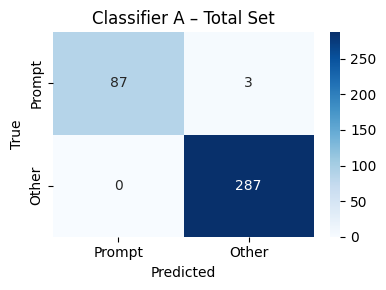

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, matthews_corrcoef, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === Step 1: Load dataset ===
df = pd.read_json("dataset_classA.json")
df = df[df['CollapseTime'].notna()].copy()

# === Step 2: Define binary labels ===
# label_A: 0 = Prompt collapse (t < 1 ms), 1 = Other
df['label_A'] = df['CollapseTime'].apply(lambda t: 0 if t < 0.001 else 1)

# === Step 3: Show label counts ===
print("Label counts for Classifier A:")
for label, count in df['label_A'].value_counts().sort_index().items():
    label_name = "Prompt collapse" if label == 0 else "Other"
    print(f"  Class {label} ({label_name}): {count} samples")

# === Step 4: Select features and labels ===
features = ['Mtot', 'Mratio_fixed', 'LambdaTilde', 'ChiEff']
X = df[features]
y = df['label_A']

# === Step 5: Train-validation split (stratified) ===
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === Step 6: Scale ===
scaler_A = StandardScaler()
X_train_scaled = scaler_A.fit_transform(X_train)
X_val_scaled = scaler_A.transform(X_val)
X_all_scaled = scaler_A.transform(X)

# === Step 7: Train model ===
model_A = GradientBoostingClassifier(n_estimators=200, max_depth=4, random_state=42)
model_A.fit(X_train_scaled, y_train)

# === Step 8: Evaluate on validation set ===
y_val_pred = model_A.predict(X_val_scaled)
acc_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)

# === Step 9: Evaluate on total set ===
y_all_pred = model_A.predict(X_all_scaled)
acc_all = accuracy_score(y, y_all_pred)
mcc_all = matthews_corrcoef(y, y_all_pred)

# === Step 10: Confusion Matrix Plotting ===
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Prompt", "Other"], yticklabels=["Prompt", "Other"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.tight_layout()
    plt.show()

print("\nClassifier A (Validation Set):")
print(f"Accuracy: {acc_val:.4f}, MCC: {mcc_val:.4f}")
plot_confusion(y_val, y_val_pred, "Classifier A – Validation Set")

print("\nClassifier A (Total Set):")
print(f"Accuracy: {acc_all:.4f}, MCC: {mcc_all:.4f}")
plot_confusion(y, y_all_pred, "Classifier A – Total Set")

###CLASSIFIER B

Label counts for Classifier B:
label_B
0     90
1    206
2     22
Name: count, dtype: int64

Classifier B (Validation Set):
Accuracy: 0.9062, MCC: 0.8144

Classifier B (Total Set):
Accuracy: 0.9811, MCC: 0.9620


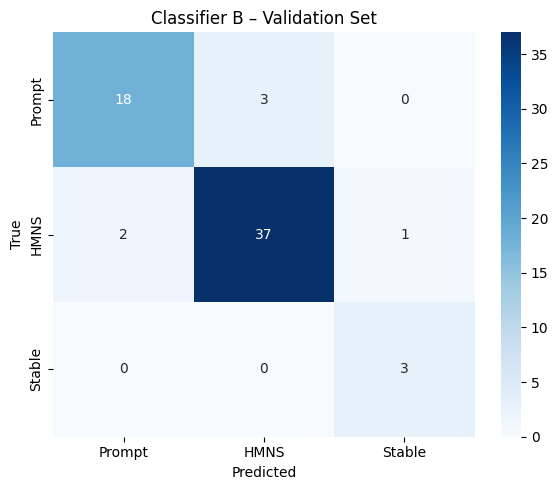

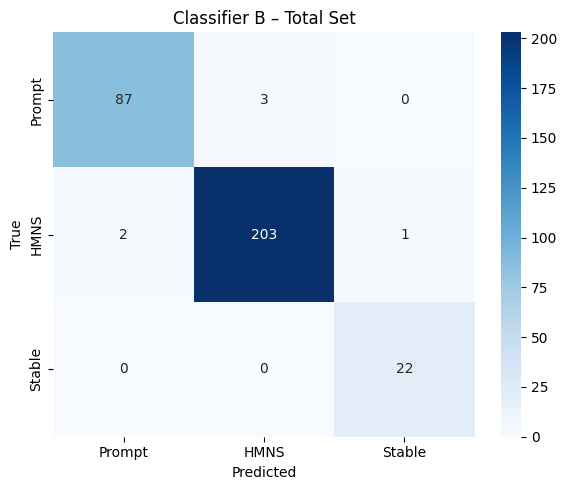

In [2]:

# === Step 1: Load dataset ===
df = pd.read_json("dataset_classBandC.json")

# === Step 2: Define 3-class mapping based on CollapseTime and RemnantKey ===
def map_label_B(row):
    ct = row['CollapseTime']
    rk = row['RemnantKey']

    if rk == 'prompt' or (pd.notna(ct) and ct < 0.001):
        return 0  # Prompt collapse
    elif 0.001 <= ct < 0.1:
        return 1  # HMNS (short + long)
    else:
        return 2  # Stable

df['label_B'] = df.apply(map_label_B, axis=1)

# === Step 3: Show label counts ===
print("Label counts for Classifier B:")
print(df['label_B'].value_counts().sort_index())

# === Step 4: Select features and labels ===
features = ['Mtot', 'Mratio_fixed', 'LambdaTilde', 'ChiEff']
X = df[features]
y = df['label_B']

# === Step 5: Split into train and validation sets (no stratification) ===
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# === Step 6: Scale features ===
scaler_B = StandardScaler()
X_train_scaled = scaler_B.fit_transform(X_train)
X_val_scaled = scaler_B.transform(X_val)
X_all_scaled = scaler_B.transform(X)

# === Step 7: Train Classifier B ===
model_B = GradientBoostingClassifier(n_estimators=200, max_depth=4, random_state=42)
model_B.fit(X_train_scaled, y_train)

# === Step 8: Evaluate on validation set ===
y_val_pred = model_B.predict(X_val_scaled)
acc_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
print("\nClassifier B (Validation Set):")
print(f"Accuracy: {acc_val:.4f}, MCC: {mcc_val:.4f}")

# === Step 9: Evaluate on full dataset ===
y_all_pred = model_B.predict(X_all_scaled)
acc_all = accuracy_score(y, y_all_pred)
mcc_all = matthews_corrcoef(y, y_all_pred)
print("\nClassifier B (Total Set):")
print(f"Accuracy: {acc_all:.4f}, MCC: {mcc_all:.4f}")

# === Step 10: Plot confusion matrices ===
def plot_conf(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Prompt", "HMNS", "Stable"],
                yticklabels=["Prompt", "HMNS", "Stable"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_conf(y_val, y_val_pred, "Classifier B – Validation Set")
plot_conf(y, y_all_pred, "Classifier B – Total Set")

###CLASSIFIER C

Label counts for Classifier C:
  Class 0: 90 samples
  Class 1: 108 samples
  Class 2: 98 samples
  Class 3: 22 samples

Classifier C (Validation Set):
Accuracy: 0.7031, MCC: 0.5771

Classifier C (Total Set):
Accuracy: 0.9371, MCC: 0.9109


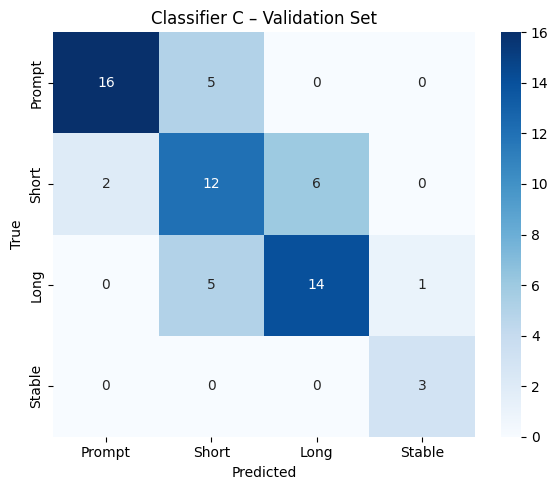

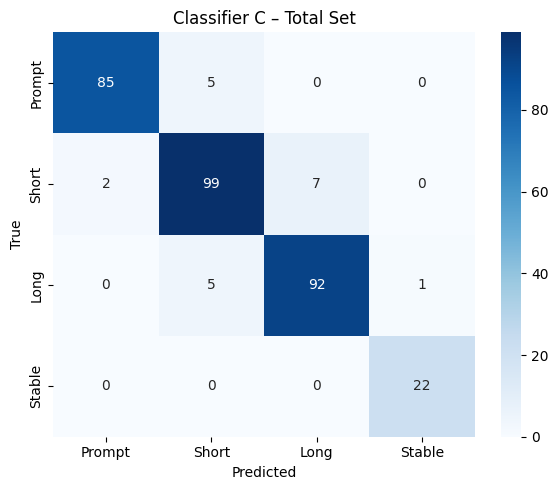

In [3]:

# === Step 1: Load dataset ===
df = pd.read_json("dataset_classBandC.json")

# === Step 2: Define 4-class label based on CollapseTime and RemnantKey ===
def map_label_C(row):
    ct = row['CollapseTime']
    rk = row['RemnantKey']

    if rk == 'prompt' or (pd.notna(ct) and ct < 0.001):
        return 0  # Prompt collapse
    elif 0.001 <= ct < 0.01:
        return 1  # Short-lived HMNS
    elif 0.01 <= ct < 0.1:
        return 2  # Long-lived HMNS
    else:
        return 3  # Stable NS

df['label_C'] = df.apply(map_label_C, axis=1)

# === Step 3: Show label counts ===
print("Label counts for Classifier C:")
for label, count in df['label_C'].value_counts().sort_index().items():
    print(f"  Class {label}: {count} samples")

# === Step 4: Select features and labels ===
features = ['Mtot', 'Mratio_fixed', 'LambdaTilde', 'ChiEff']
X = df[features]
y = df['label_C']

# === Step 5: Train-validation split (no stratification) ===
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# === Step 6: Scale ===
scaler_C = StandardScaler()
X_train_scaled = scaler_C.fit_transform(X_train)
X_val_scaled = scaler_C.transform(X_val)
X_all_scaled = scaler_C.transform(X)

# === Step 7: Train Classifier C ===
model_C = GradientBoostingClassifier(n_estimators=200, max_depth=4, random_state=42)
model_C.fit(X_train_scaled, y_train)

# === Step 8: Evaluate on validation set ===
y_val_pred = model_C.predict(X_val_scaled)
acc_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
print("\nClassifier C (Validation Set):")
print(f"Accuracy: {acc_val:.4f}, MCC: {mcc_val:.4f}")

# === Step 9: Evaluate on total set ===
y_all_pred = model_C.predict(X_all_scaled)
acc_all = accuracy_score(y, y_all_pred)
mcc_all = matthews_corrcoef(y, y_all_pred)
print("\nClassifier C (Total Set):")
print(f"Accuracy: {acc_all:.4f}, MCC: {mcc_all:.4f}")

# === Step 10: Confusion matrix ===
def plot_conf(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3])
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Prompt", "Short", "Long", "Stable"],
                yticklabels=["Prompt", "Short", "Long", "Stable"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_conf(y_val, y_val_pred, "Classifier C – Validation Set")
plot_conf(y, y_all_pred, "Classifier C – Total Set")

###PREDICTIONS

In [10]:
import pandas as pd
import numpy as np
from collections import Counter

# === Step 1: Load posterior CSV ===
df_17 = pd.read_csv("GW170817_result.posterior.csv")

# === Step 2: Compute derived GW features (source-frame masses) ===
# Using already source-frame values
df_17["Mtot"] = df_17["mass_1_source"] + df_17["mass_2_source"]
df_17["Mratio_fixed"] = df_17["mass_1_source"] / df_17["mass_2_source"]

df_17["LambdaTilde"] = (
    (16.0 / 13.0) * (
        (df_17["mass_1_source"] + 12 * df_17["mass_2_source"]) * df_17["lambda_1"] +
        (df_17["mass_2_source"] + 12 * df_17["mass_1_source"]) * df_17["lambda_2"]
    ) / (df_17["Mtot"] ** 5)
)

df_17["ChiEff"] = (
    df_17["mass_1_source"] * df_17["a_1"] * df_17["cos_tilt_1"] +
    df_17["mass_2_source"] * df_17["a_2"] * df_17["cos_tilt_2"]
) / df_17["Mtot"]

# === Step 3: Select cleaned features ===
features = ["Mtot", "Mratio_fixed", "LambdaTilde", "ChiEff"]
df_17 = df_17[features].replace([np.inf, -np.inf], np.nan).dropna()

# === Step 4: Scale ===
X_17_A = scaler_A.transform(df_17)
X_17_B = scaler_B.transform(df_17)
X_17_C = scaler_C.transform(df_17)

# === Step 5: Predict ===
pred_17_A = model_A.predict(X_17_A)
pred_17_B = model_B.predict(X_17_B)
pred_17_C = model_C.predict(X_17_C)

prob_17_A = model_A.predict_proba(X_17_A)
prob_17_B = model_B.predict_proba(X_17_B)
prob_17_C = model_C.predict_proba(X_17_C)

# === Step 6: Display ===
print("\n--- GW170817 Predictions ---")
print("Classifier A:", dict(Counter(pred_17_A)))
print("Classifier B:", dict(Counter(pred_17_B)))
print("Classifier C:", dict(Counter(pred_17_C)))


--- GW170817 Predictions ---
Classifier A: {np.int64(0): 80295, np.int64(1): 8364}
Classifier B: {np.int64(0): 85941, np.int64(1): 2718}
Classifier C: {np.int64(0): 85955, np.int64(1): 2407, np.int64(2): 297}


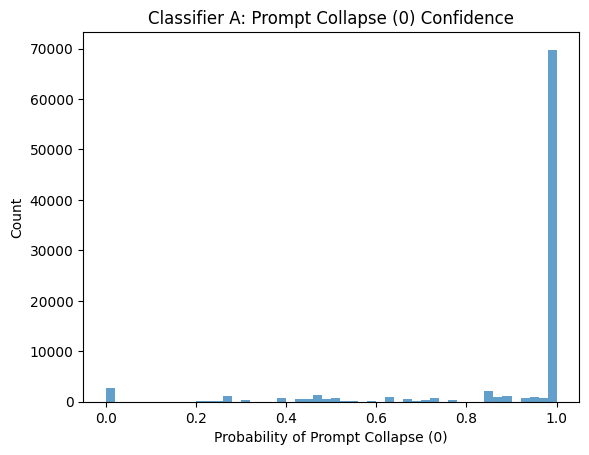

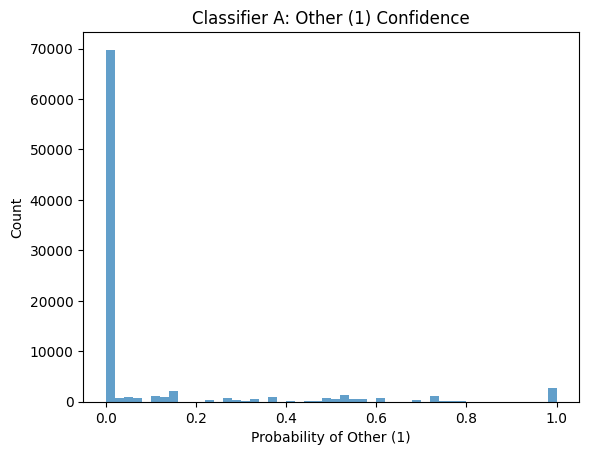

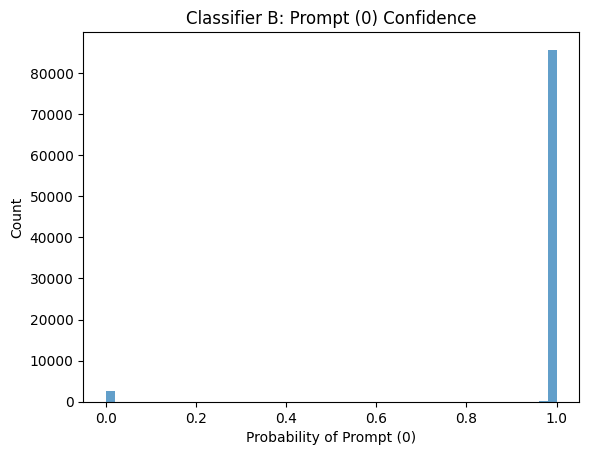

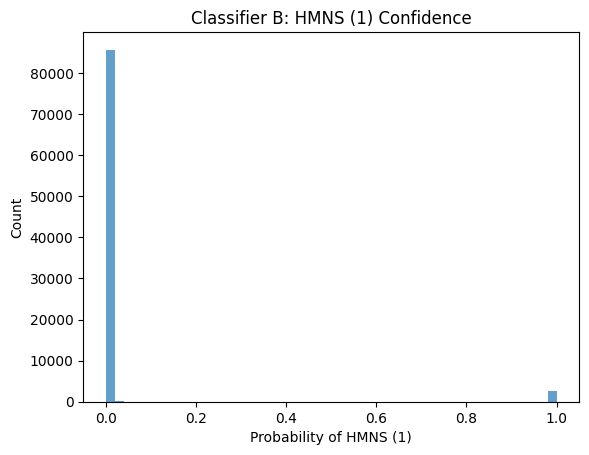

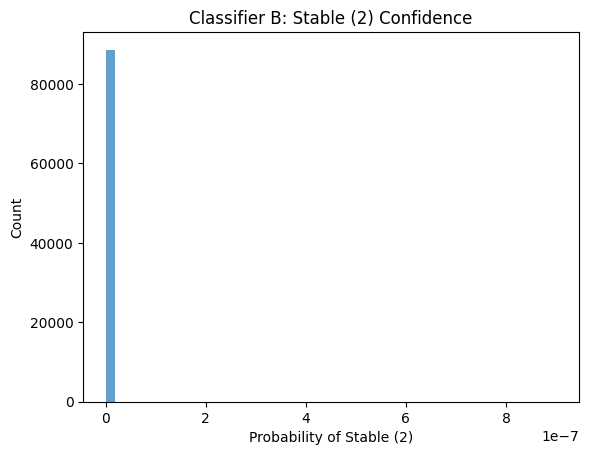

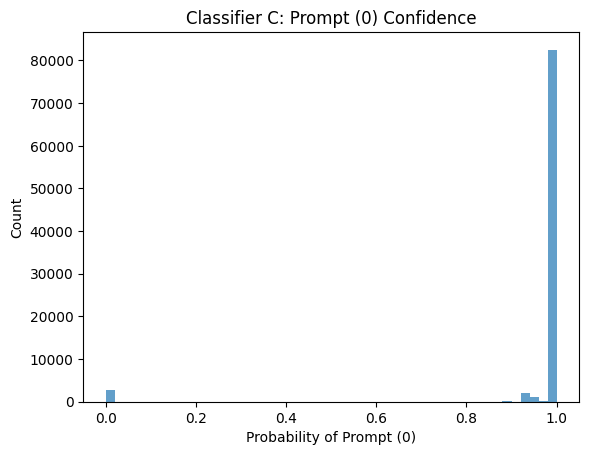

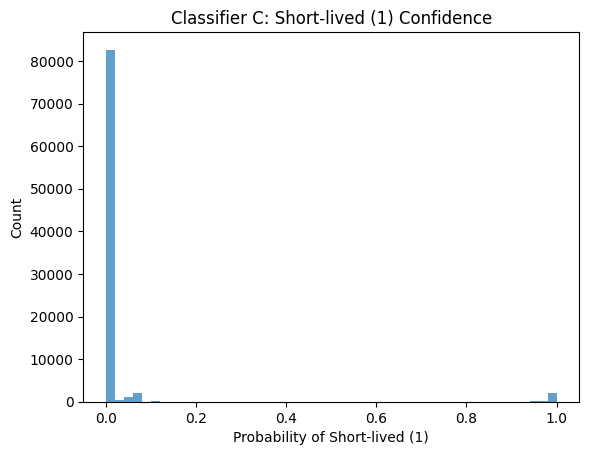

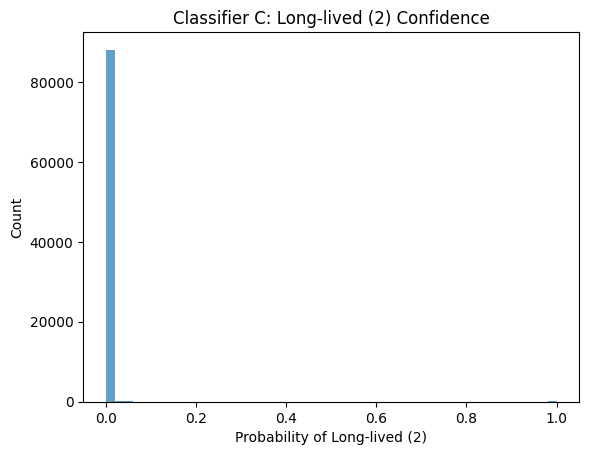

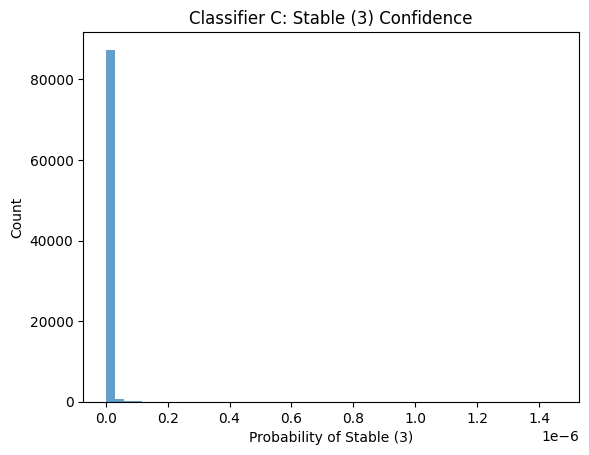

In [11]:
import matplotlib.pyplot as plt

# === Labels for each classifier ===
labels_A = ["Prompt Collapse (0)", "Other (1)"]
labels_B = ["Prompt (0)", "HMNS (1)", "Stable (2)"]
labels_C = ["Prompt (0)", "Short-lived (1)", "Long-lived (2)", "Stable (3)"]

probs = [prob_17_A, prob_17_B, prob_17_C]
titles = [labels_A, labels_B, labels_C]
clf_names = ["Classifier A", "Classifier B", "Classifier C"]

# === Plot histograms ===
for i, (prob, label_list, name) in enumerate(zip(probs, titles, clf_names)):
    for j, label in enumerate(label_list):
        plt.hist(prob[:, j], bins=50, alpha=0.7)
        plt.xlabel(f"Probability of {label}")
        plt.ylabel("Count")
        plt.title(f"{name}: {label} Confidence")
        plt.show()

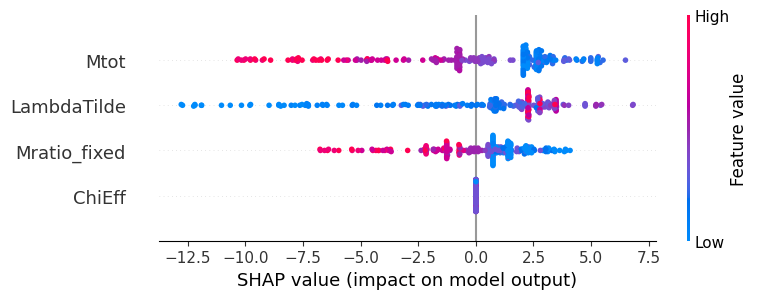

In [6]:
import shap

explainer = shap.Explainer(model_A, X_train_scaled)
shap_values = explainer(X_train_scaled)

shap.summary_plot(shap_values, features=X_train, feature_names=features)

####EVENT+EoS

In [18]:
import pandas as pd
import numpy as np
from collections import Counter

# --- Load EoS-conditioned posterior samples ---
df_eos = pd.read_csv("EoS.csv")

# Map your column names to what we need
m1 = df_eos["m1_source_frame_Msun"].astype(float)
m2 = df_eos["m2_source_frame_Msun"].astype(float)
lam1 = df_eos["Lambda1"].astype(float)
lam2 = df_eos["Lambda2"].astype(float)

# --- Derived features (source-frame masses) ---
Mtot_eos = m1 + m2
Mratio_fixed_eos = m1 / m2

LambdaTilde_eos = (
    (16.0/13.0) * ((m1 + 12.0*m2) * lam1 + (m2 + 12.0*m1) * lam2) / (Mtot_eos**5)
)

# ChiEff: use spins if present; otherwise assume ~low spins -> 0
if {"a_1","a_2","cos_tilt_1","cos_tilt_2"}.issubset(df_eos.columns):
    chi_eff_eos = (
        m1 * df_eos["a_1"].astype(float) * df_eos["cos_tilt_1"].astype(float) +
        m2 * df_eos["a_2"].astype(float) * df_eos["cos_tilt_2"].astype(float)
    ) / Mtot_eos
else:
    chi_eff_eos = np.zeros(len(df_eos), dtype=float)
    print("Note: No spin columns in EoS.csv; setting ChiEff = 0 for all samples.")

# Build feature matrix
features_eos_cols = ["Mtot", "Mratio_fixed", "LambdaTilde", "ChiEff"]
X_df_eos = pd.DataFrame({
    "Mtot": Mtot_eos,
    "Mratio_fixed": Mratio_fixed_eos,
    "LambdaTilde": LambdaTilde_eos,
    "ChiEff": chi_eff_eos,
}).replace([np.inf, -np.inf], np.nan).dropna()

# --- Scale ---
X_eos_A = scaler_A.transform(X_df_eos)
X_eos_B = scaler_B.transform(X_df_eos)
X_eos_C = scaler_C.transform(X_df_eos)

# --- Predict ---
pred_eos_A = model_A.predict(X_eos_A)
pred_eos_B = model_B.predict(X_eos_B)
pred_eos_C = model_C.predict(X_eos_C)

prob_eos_A = model_A.predict_proba(X_eos_A)
prob_eos_B = model_B.predict_proba(X_eos_B)
prob_eos_C = model_C.predict_proba(X_eos_C)

print("\n--- GW170817 + EoS (from EoS.csv) ---")
print("Classifier A:", dict(Counter(pred_eos_A)))
print("Classifier B:", dict(Counter(pred_eos_B)))
print("Classifier C:", dict(Counter(pred_eos_C)))

Note: No spin columns in EoS.csv; setting ChiEff = 0 for all samples.

--- GW170817 + EoS (from EoS.csv) ---
Classifier A: {np.int64(0): 2783, np.int64(1): 138}
Classifier B: {np.int64(0): 2882, np.int64(1): 39}
Classifier C: {np.int64(0): 2882, np.int64(1): 36, np.int64(2): 3}


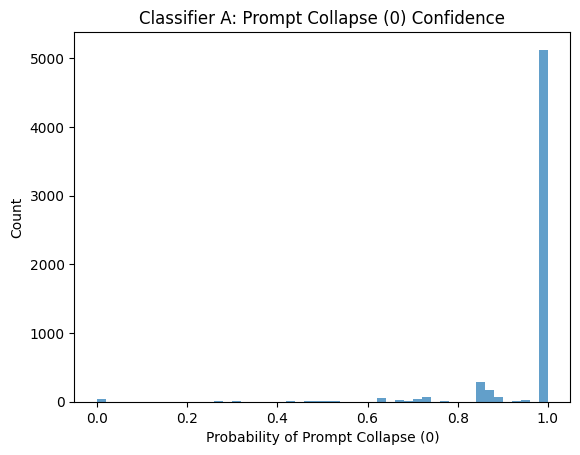

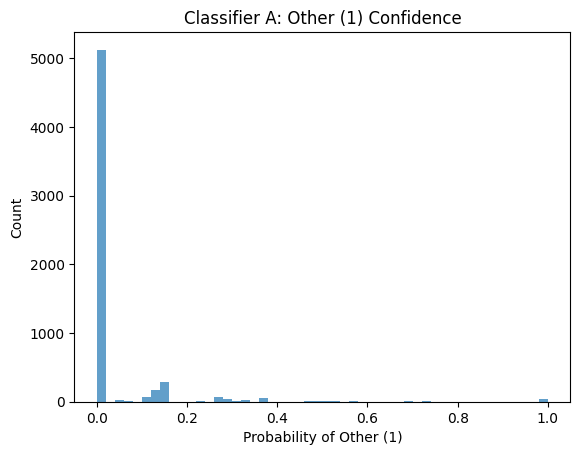

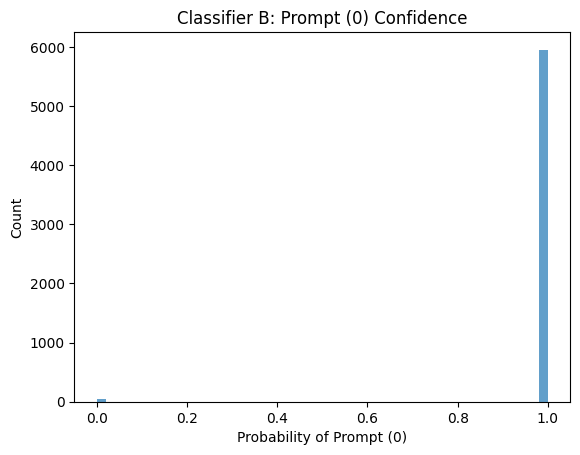

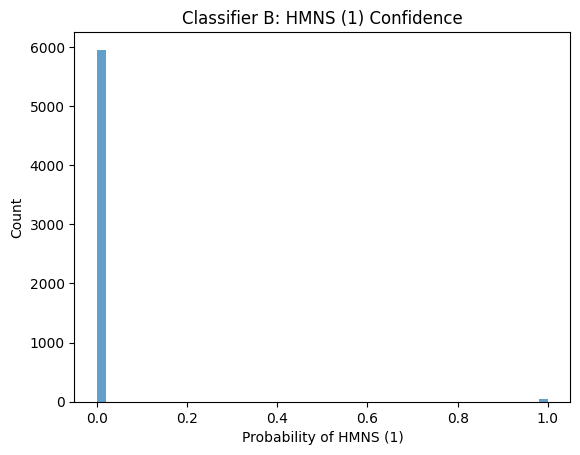

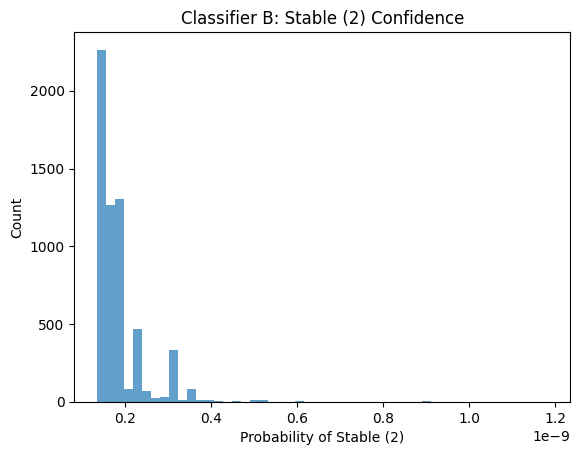

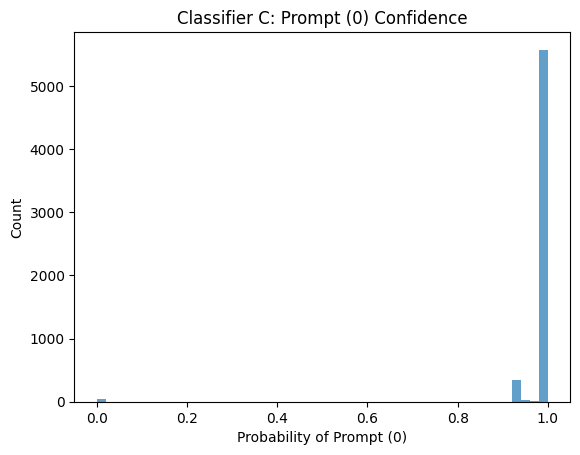

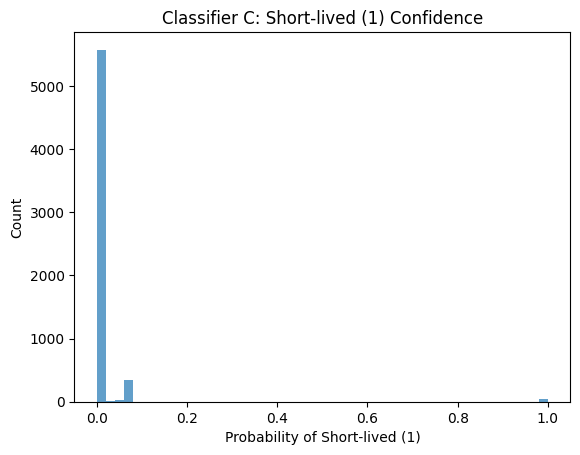

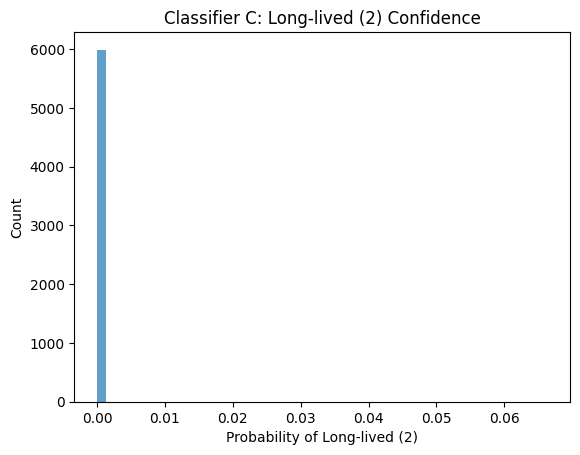

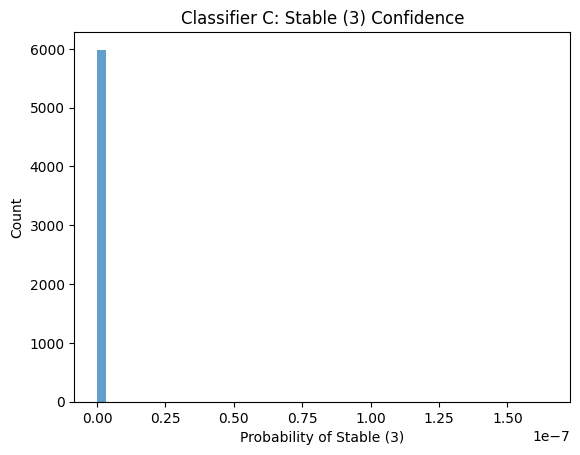

In [19]:
import matplotlib.pyplot as plt

# === Labels for each classifier ===
labels_e_A = ["Prompt Collapse (0)", "Other (1)"]
labels_e_B = ["Prompt (0)", "HMNS (1)", "Stable (2)"]
labels_e_C = ["Prompt (0)", "Short-lived (1)", "Long-lived (2)", "Stable (3)"]

probs = [prob_kn_A, prob_kn_B, prob_kn_C]
titles = [labels_e_A, labels_e_B, labels_e_C]
clf_names = ["Classifier A", "Classifier B", "Classifier C"]

# === Plot histograms ===
for i, (prob, label_list, name) in enumerate(zip(probs, titles, clf_names)):
    for j, label in enumerate(label_list):
        plt.hist(prob[:, j], bins=50, alpha=0.7)
        plt.xlabel(f"Probability of {label}")
        plt.ylabel("Count")
        plt.title(f"{name}: {label} Confidence")
        plt.show()

####EVENT+KN

In [7]:
df_kn = pd.read_csv("GW170817_KN_result.posterior.csv")

df_kn["Mtot"] = df_kn["mass_1_source"] + df_kn["mass_2_source"]
df_kn["Mratio_fixed"] = df_kn["mass_1_source"] / df_kn["mass_2_source"]
df_kn["LambdaTilde"] = (
    (16.0/13.0) * (
        (df_kn["mass_1_source"] + 12.0*df_kn["mass_2_source"]) * df_kn["lambda_1"] +
        (df_kn["mass_2_source"] + 12.0*df_kn["mass_1_source"]) * df_kn["lambda_2"]
    ) / (df_kn["Mtot"]**5)
)
df_kn["ChiEff"] = (
    df_kn["mass_1_source"] * df_kn["a_1"] * df_kn["cos_tilt_1"] +
    df_kn["mass_2_source"] * df_kn["a_2"] * df_kn["cos_tilt_2"]
) / df_kn["Mtot"]

features_kn = ["Mtot", "Mratio_fixed", "LambdaTilde", "ChiEff"]
X_kn_A = scaler_A.transform(df_kn[features_kn].replace([np.inf, -np.inf], np.nan).dropna())
X_kn_B = scaler_B.transform(df_kn[features_kn].replace([np.inf, -np.inf], np.nan).dropna())
X_kn_C = scaler_C.transform(df_kn[features_kn].replace([np.inf, -np.inf], np.nan).dropna())

pred_kn_A = model_A.predict(X_kn_A)
pred_kn_B = model_B.predict(X_kn_B)
pred_kn_C = model_C.predict(X_kn_C)

prob_kn_A = model_A.predict_proba(X_kn_A)
prob_kn_B = model_B.predict_proba(X_kn_B)
prob_kn_C = model_C.predict_proba(X_kn_C)

print("\n--- GW170817 + KN ---")
print("Classifier A:", dict(Counter(pred_kn_A)))
print("Classifier B:", dict(Counter(pred_kn_B)))
print("Classifier C:", dict(Counter(pred_kn_C)))


--- GW170817 + KN ---
Classifier A: {np.int64(0): 5896, np.int64(1): 95}
Classifier B: {np.int64(0): 5952, np.int64(1): 39}
Classifier C: {np.int64(0): 5952, np.int64(1): 39}


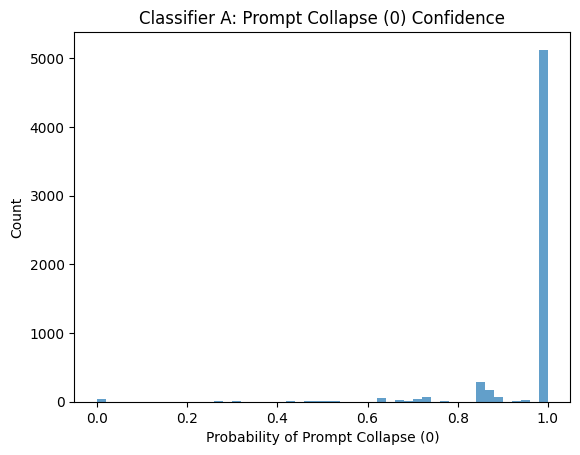

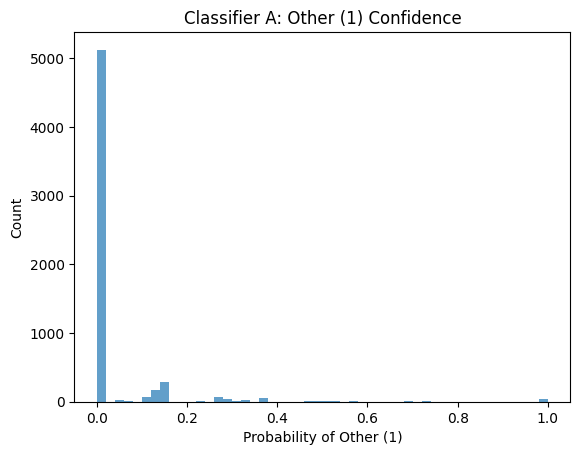

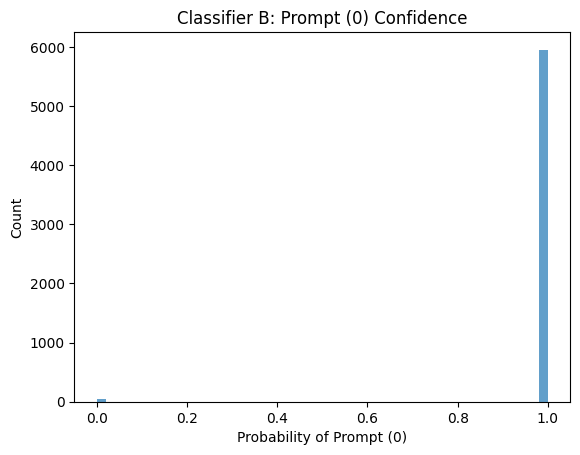

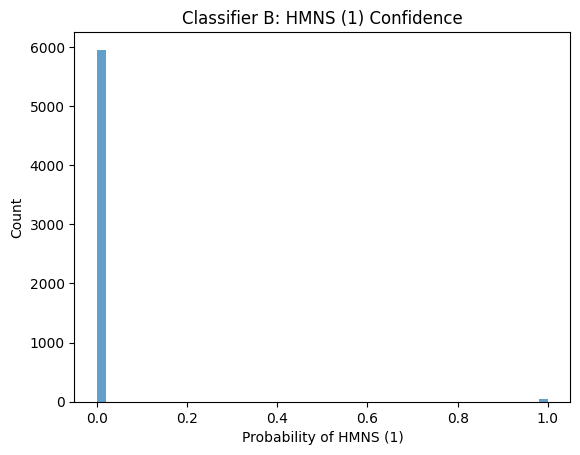

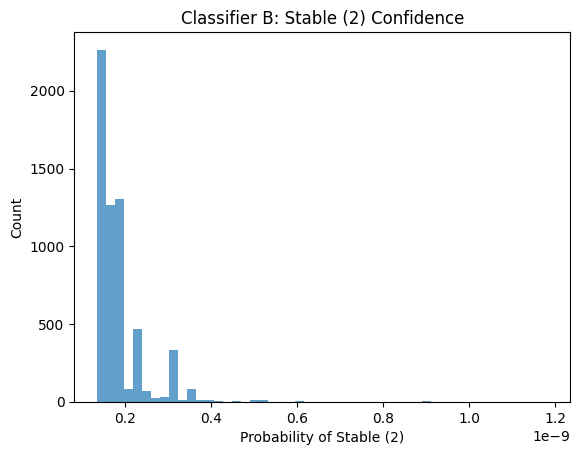

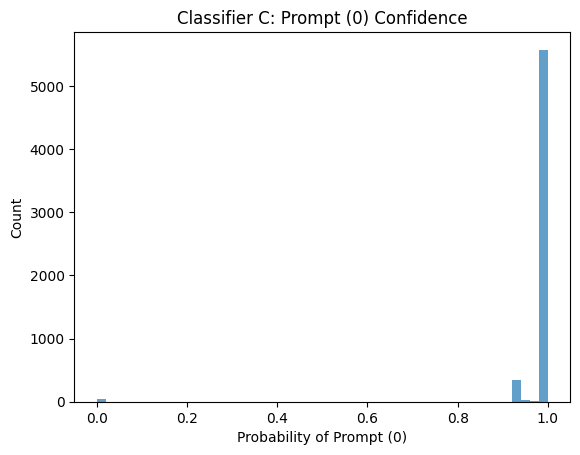

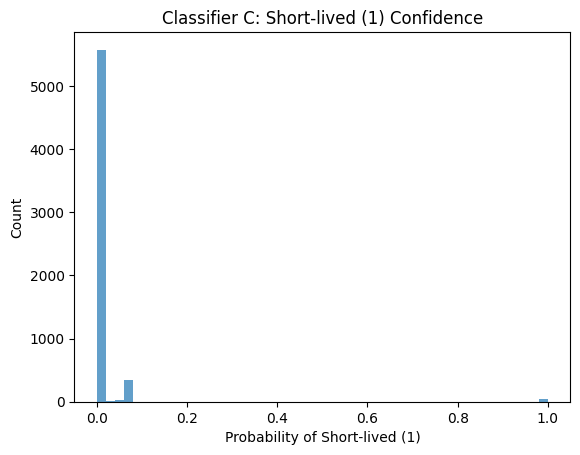

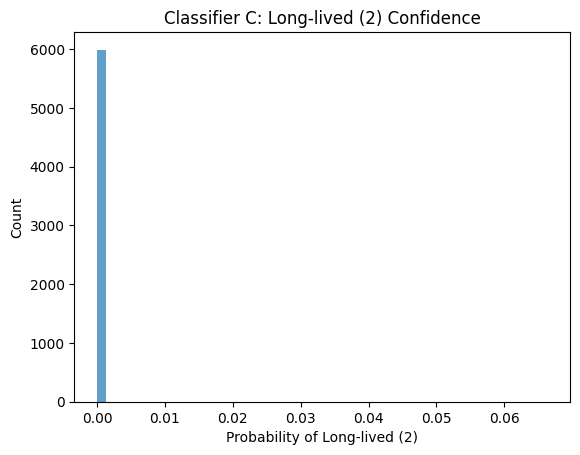

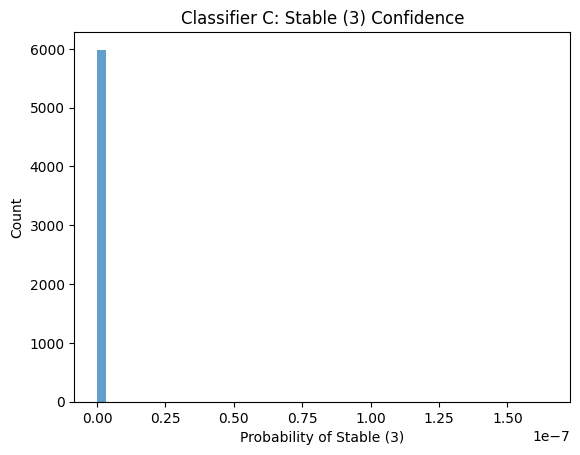

In [9]:
import matplotlib.pyplot as plt

# === Labels for each classifier ===
labelskn_A = ["Prompt Collapse (0)", "Other (1)"]
labelskn_B = ["Prompt (0)", "HMNS (1)", "Stable (2)"]
labelskn_C = ["Prompt (0)", "Short-lived (1)", "Long-lived (2)", "Stable (3)"]

probs = [prob_kn_A, prob_kn_B, prob_kn_C]
titles = [labelskn_A, labelskn_B, labelskn_C]
clf_names = ["Classifier A", "Classifier B", "Classifier C"]

# === Plot histograms ===
for i, (prob, label_list, name) in enumerate(zip(probs, titles, clf_names)):
    for j, label in enumerate(label_list):
        plt.hist(prob[:, j], bins=50, alpha=0.7)
        plt.xlabel(f"Probability of {label}")
        plt.ylabel("Count")
        plt.title(f"{name}: {label} Confidence")
        plt.show()

####EVENT+KN+GRB

In [12]:
df_kn_grb = pd.read_csv("GW170817_KN_GRB_result.posterior.csv")

df_kn_grb["Mtot"] = df_kn_grb["mass_1_source"] + df_kn_grb["mass_2_source"]
df_kn_grb["Mratio_fixed"] = df_kn_grb["mass_1_source"] / df_kn_grb["mass_2_source"]
df_kn_grb["LambdaTilde"] = (
    (16.0/13.0) * (
        (df_kn_grb["mass_1_source"] + 12.0*df_kn_grb["mass_2_source"]) * df_kn_grb["lambda_1"] +
        (df_kn_grb["mass_2_source"] + 12.0*df_kn_grb["mass_1_source"]) * df_kn_grb["lambda_2"]
    ) / (df_kn_grb["Mtot"]**5)
)
df_kn_grb["ChiEff"] = (
    df_kn_grb["mass_1_source"] * df_kn_grb["a_1"] * df_kn_grb["cos_tilt_1"] +
    df_kn_grb["mass_2_source"] * df_kn_grb["a_2"] * df_kn_grb["cos_tilt_2"]
) / df_kn_grb["Mtot"]

features_kn_grb = ["Mtot", "Mratio_fixed", "LambdaTilde", "ChiEff"]
X_kn_grb_A = scaler_A.transform(df_kn_grb[features_kn_grb].replace([np.inf, -np.inf], np.nan).dropna())
X_kn_grb_B = scaler_B.transform(df_kn_grb[features_kn_grb].replace([np.inf, -np.inf], np.nan).dropna())
X_kn_grb_C = scaler_C.transform(df_kn_grb[features_kn_grb].replace([np.inf, -np.inf], np.nan).dropna())

pred_kn_grb_A = model_A.predict(X_kn_grb_A)
pred_kn_grb_B = model_B.predict(X_kn_grb_B)
pred_kn_grb_C = model_C.predict(X_kn_grb_C)

prob_kn_grb_A = model_A.predict_proba(X_kn_grb_A)
prob_kn_grb_B = model_B.predict_proba(X_kn_grb_B)
prob_kn_grb_C = model_C.predict_proba(X_kn_grb_C)

print("\n--- GW170817 + KN + GRB ---")
print("Classifier A:", dict(Counter(pred_kn_grb_A)))
print("Classifier B:", dict(Counter(pred_kn_grb_B)))
print("Classifier C:", dict(Counter(pred_kn_grb_C)))


--- GW170817 + KN + GRB ---
Classifier A: {np.int64(0): 8342, np.int64(1): 307}
Classifier B: {np.int64(0): 8638, np.int64(1): 11}
Classifier C: {np.int64(0): 8638, np.int64(1): 9, np.int64(2): 2}


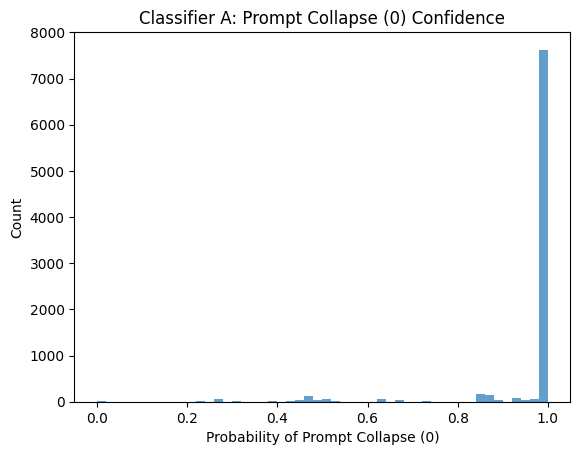

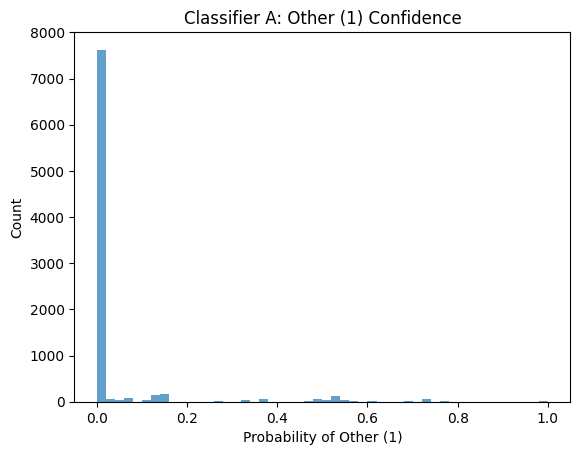

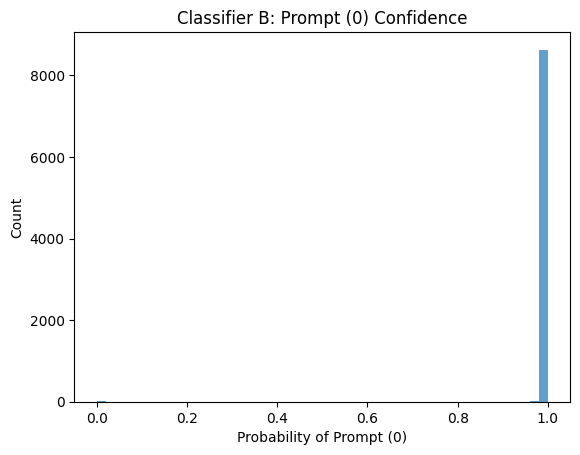

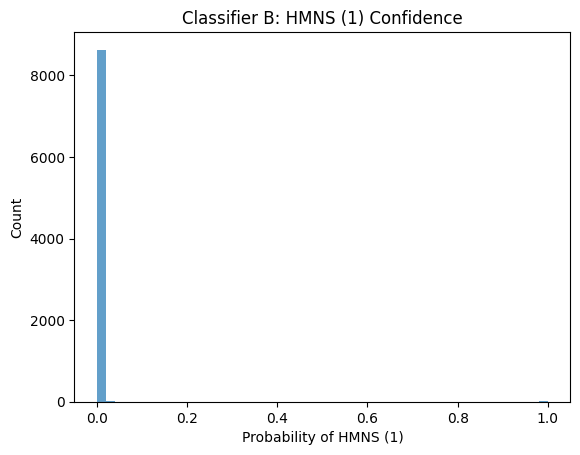

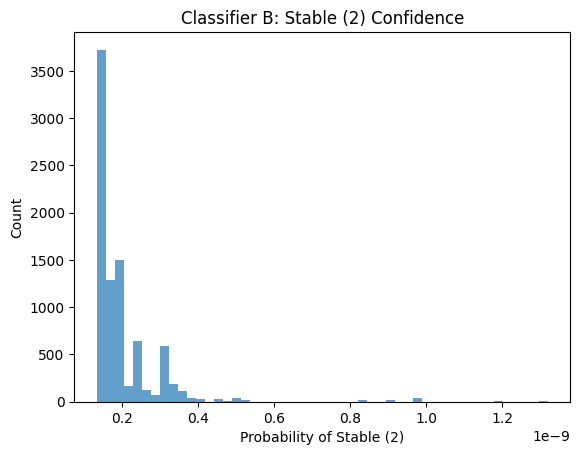

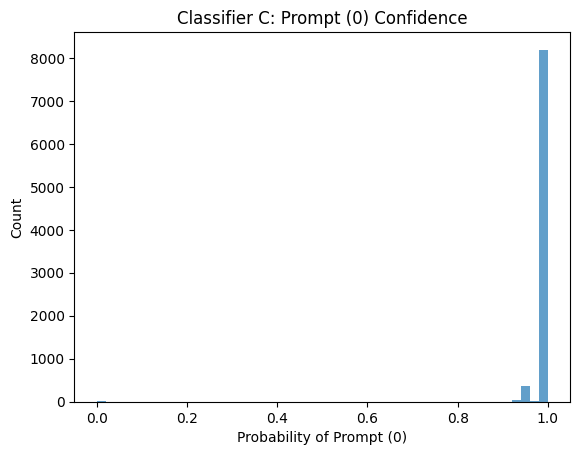

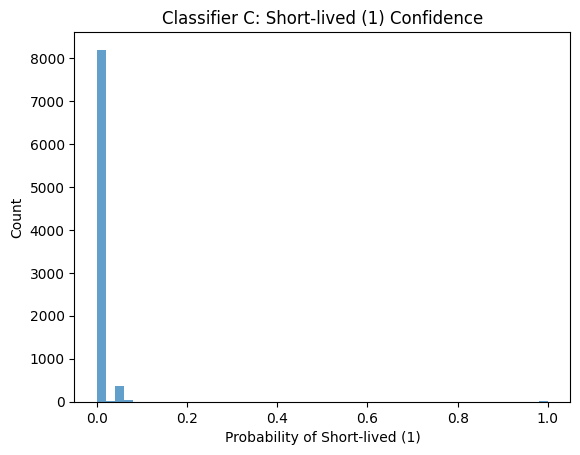

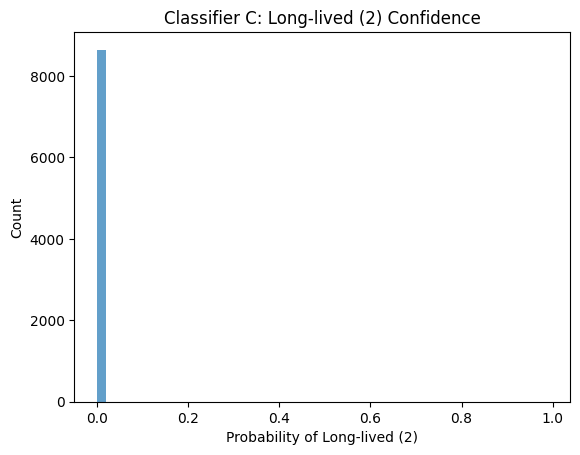

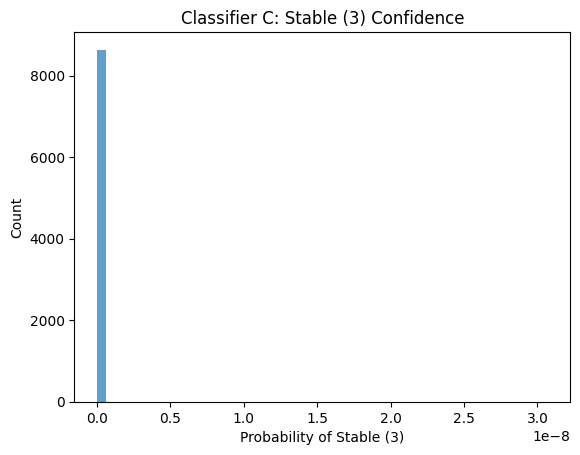

In [13]:
import matplotlib.pyplot as plt

# === Labels for each classifier ===
labelskg_A = ["Prompt Collapse (0)", "Other (1)"]
labelskg_B = ["Prompt (0)", "HMNS (1)", "Stable (2)"]
labelskg_C = ["Prompt (0)", "Short-lived (1)", "Long-lived (2)", "Stable (3)"]

probs = [prob_kn_grb_A, prob_kn_grb_B, prob_kn_grb_C]
titles = [labelskg_A, labelskg_B, labelskg_C]
clf_names = ["Classifier A", "Classifier B", "Classifier C"]

# === Plot histograms ===
for i, (prob, label_list, name) in enumerate(zip(probs, titles, clf_names)):
    for j, label in enumerate(label_list):
        plt.hist(prob[:, j], bins=50, alpha=0.7)
        plt.xlabel(f"Probability of {label}")
        plt.ylabel("Count")
        plt.title(f"{name}: {label} Confidence")
        plt.show()

####GW190425

In [14]:
import pandas as pd
import numpy as np
from collections import Counter

# --- Load ---
df_190425 = pd.read_csv("gw190425_result.posterior.csv")

# --- Derived features (source-frame masses) ---
df_190425["Mtot"] = df_190425["mass_1_source"] + df_190425["mass_2_source"]
df_190425["Mratio_fixed"] = df_190425["mass_1_source"] / df_190425["mass_2_source"]

df_190425["LambdaTilde"] = (
    (16.0/13.0) * (
        (df_190425["mass_1_source"] + 12.0*df_190425["mass_2_source"]) * df_190425["lambda_1"] +
        (df_190425["mass_2_source"] + 12.0*df_190425["mass_1_source"]) * df_190425["lambda_2"]
    ) / (df_190425["Mtot"]**5)
)

df_190425["ChiEff"] = (
    df_190425["mass_1_source"] * df_190425["a_1"] * df_190425["cos_tilt_1"] +
    df_190425["mass_2_source"] * df_190425["a_2"] * df_190425["cos_tilt_2"]
) / df_190425["Mtot"]

# --- Clean ---
features_190425 = ["Mtot", "Mratio_fixed", "LambdaTilde", "ChiEff"]
X_df_190425 = df_190425[features_190425].replace([np.inf, -np.inf], np.nan).dropna()

# --- Scale ---
X_190425_A = scaler_A.transform(X_df_190425)
X_190425_B = scaler_B.transform(X_df_190425)
X_190425_C = scaler_C.transform(X_df_190425)

# --- Predict ---
pred_190425_A = model_A.predict(X_190425_A)
pred_190425_B = model_B.predict(X_190425_B)
pred_190425_C = model_C.predict(X_190425_C)

prob_190425_A = model_A.predict_proba(X_190425_A)
prob_190425_B = model_B.predict_proba(X_190425_B)
prob_190425_C = model_C.predict_proba(X_190425_C)

print("\n--- GW190425 (GW-only) ---")
print("Classifier A:", dict(Counter(pred_190425_A)))
print("Classifier B:", dict(Counter(pred_190425_B)))
print("Classifier C:", dict(Counter(pred_190425_C)))


--- GW190425 (GW-only) ---
Classifier A: {np.int64(0): 65899, np.int64(1): 1}
Classifier B: {np.int64(0): 65898, np.int64(1): 2}
Classifier C: {np.int64(0): 65899, np.int64(1): 1}


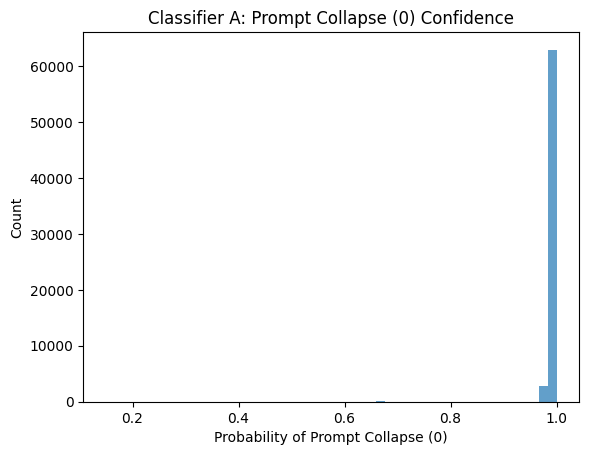

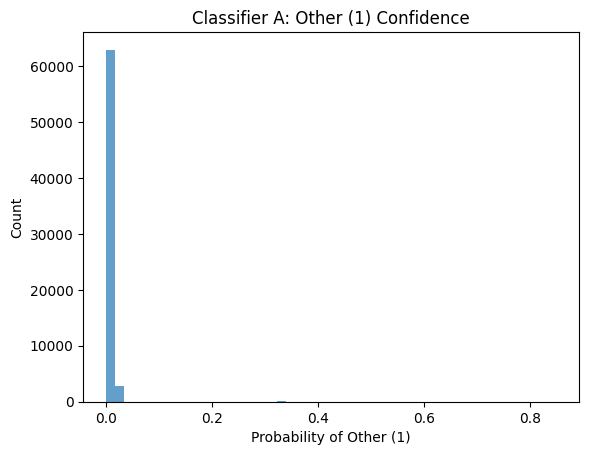

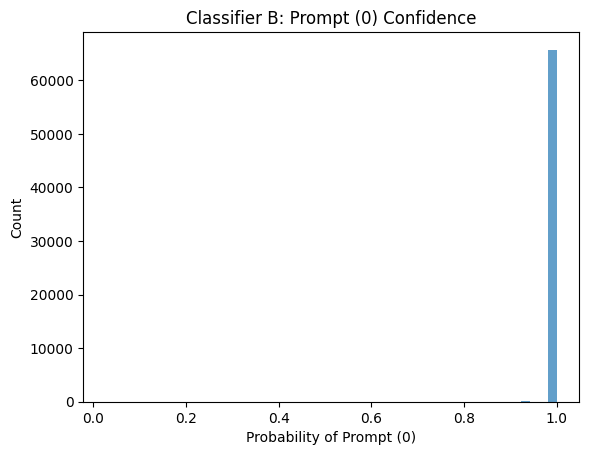

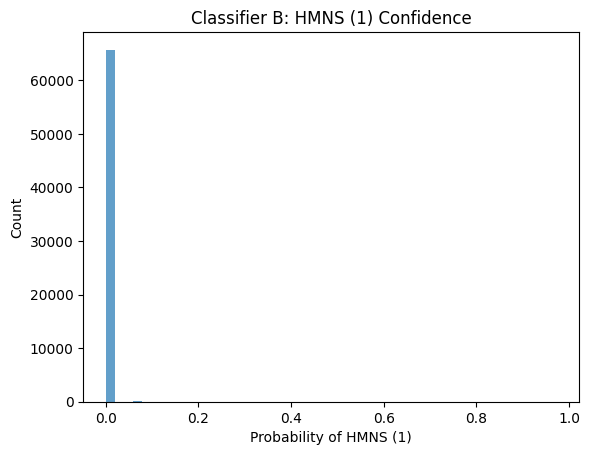

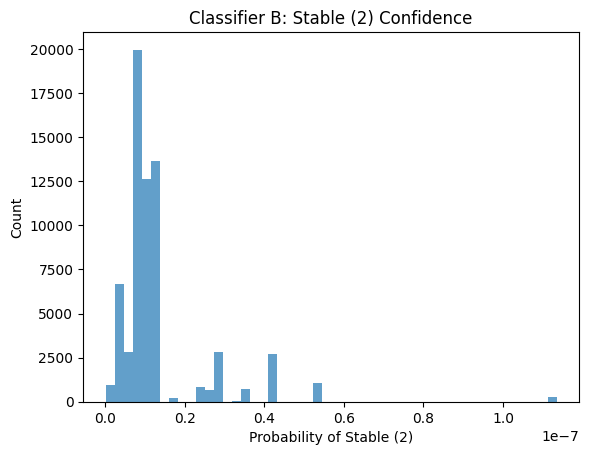

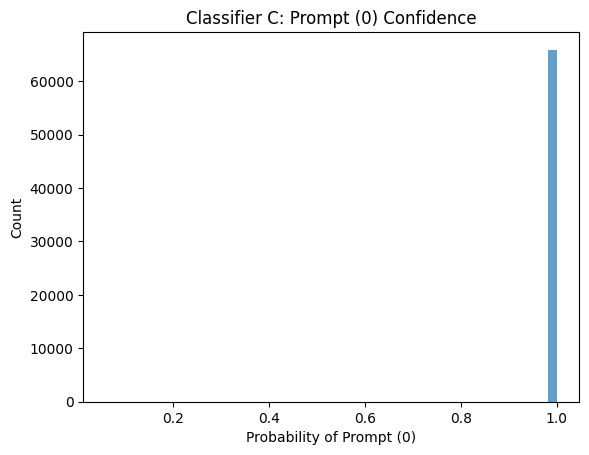

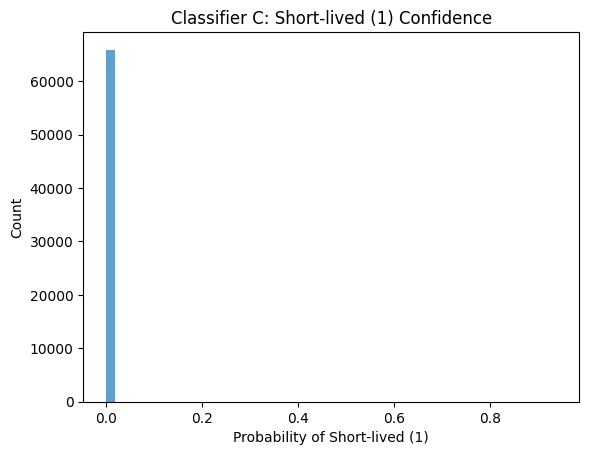

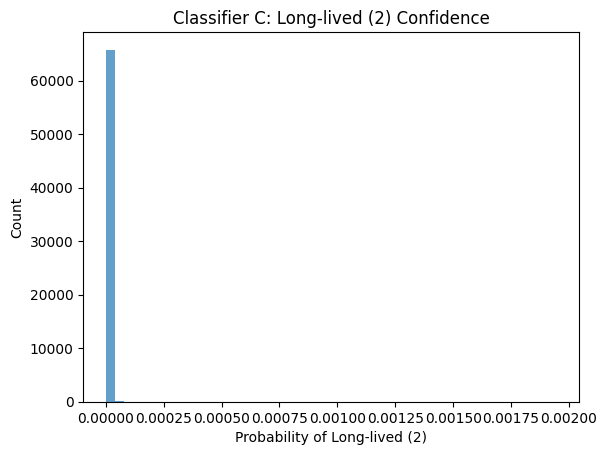

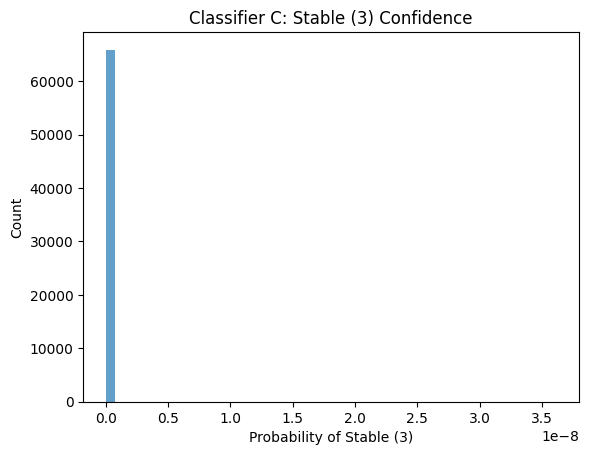

In [15]:
import matplotlib.pyplot as plt

# === Labels for each classifier ===
label_A = ["Prompt Collapse (0)", "Other (1)"]
label_B = ["Prompt (0)", "HMNS (1)", "Stable (2)"]
label_C = ["Prompt (0)", "Short-lived (1)", "Long-lived (2)", "Stable (3)"]

probs = [prob_190425_A, prob_190425_B, prob_190425_C]
titles = [label_A, label_B, label_C]
clf_names = ["Classifier A", "Classifier B", "Classifier C"]

# === Plot histograms ===
for i, (prob, label_list, name) in enumerate(zip(probs, titles, clf_names)):
    for j, label in enumerate(label_list):
        plt.hist(prob[:, j], bins=50, alpha=0.7)
        plt.xlabel(f"Probability of {label}")
        plt.ylabel("Count")
        plt.title(f"{name}: {label} Confidence")
        plt.show()

In [20]:
import pandas as pd
import numpy as np

# Helper to format as percentage string
def fmt(p):
    return f"{100 * p:.1f}%"

# === Classifier A (2 classes assumed: index 0,1) ===
A_17      = np.mean(prob_17_A, axis=0)         # GW170817 (GW-only)
A_eos     = np.mean(prob_eos_A, axis=0)        # GW170817 + EoS
A_kn      = np.mean(prob_kn_A, axis=0)         # GW170817 + KN
A_kn_grb  = np.mean(prob_kn_grb_A, axis=0)     # GW170817 + KN + GRB
A_190425  = np.mean(prob_190425_A, axis=0)     # GW190425 (GW-only)

# === Classifier B (3 classes assumed: index 0,1,2) ===
B_17      = np.mean(prob_17_B, axis=0)
B_eos     = np.mean(prob_eos_B, axis=0)
B_kn      = np.mean(prob_kn_B, axis=0)
B_kn_grb  = np.mean(prob_kn_grb_B, axis=0)
B_190425  = np.mean(prob_190425_B, axis=0)

# === Classifier C (4 classes assumed: index 0,1,2,3) ===
C_17      = np.mean(prob_17_C, axis=0)
C_eos     = np.mean(prob_eos_C, axis=0)
C_kn      = np.mean(prob_kn_C, axis=0)
C_kn_grb  = np.mean(prob_kn_grb_C, axis=0)
C_190425  = np.mean(prob_190425_C, axis=0)

# === Final Summary Table ===
summary_table = pd.DataFrame({
    "Event": [
        "GW170817 (GW-only)",
        "GW170817 + EoS",
        "GW170817 + KN",
        "GW170817 + KN + GRB",
        "GW190425 (GW-only)",
    ],
    # Classifier A
    "p_PCBH_A": [fmt(A_17[0]), fmt(A_eos[0]), fmt(A_kn[0]), fmt(A_kn_grb[0]), fmt(A_190425[0])],
    "p_RNS_A":  [fmt(A_17[1]), fmt(A_eos[1]), fmt(A_kn[1]), fmt(A_kn_grb[1]), fmt(A_190425[1])],

    # Classifier B
    "p_PCBH_B": [fmt(B_17[0]), fmt(B_eos[0]), fmt(B_kn[0]), fmt(B_kn_grb[0]), fmt(B_190425[0])],
    "p_HMNS_B": [fmt(B_17[1]), fmt(B_eos[1]), fmt(B_kn[1]), fmt(B_kn_grb[1]), fmt(B_190425[1])],
    "p_NC_B":   [fmt(B_17[2]), fmt(B_eos[2]), fmt(B_kn[2]), fmt(B_kn_grb[2]), fmt(B_190425[2])],

    # Classifier C
    "p_PCBH_C":  [fmt(C_17[0]), fmt(C_eos[0]), fmt(C_kn[0]), fmt(C_kn_grb[0]), fmt(C_190425[0])],
    "p_SHORT_C": [fmt(C_17[1]), fmt(C_eos[1]), fmt(C_kn[1]), fmt(C_kn_grb[1]), fmt(C_190425[1])],
    "p_LONG_C":  [fmt(C_17[2]), fmt(C_eos[2]), fmt(C_kn[2]), fmt(C_kn_grb[2]), fmt(C_190425[2])],
    "p_NC_C":    [fmt(C_17[3]), fmt(C_eos[3]), fmt(C_kn[3]), fmt(C_kn_grb[3]), fmt(C_190425[3])],
})

print("\nMerger Outcome Probability Table:")
display(summary_table)


Merger Outcome Probability Table:


,Event,p_PCBH_A,p_RNS_A,p_PCBH_B,p_HMNS_B,p_NC_B,p_PCBH_C,p_SHORT_C,p_LONG_C,p_NC_C
0,GW170817 (GW-only),90.5%,9.5%,96.9%,3.1%,0.0%,96.6%,3.1%,0.3%,0.0%
1,GW170817 + EoS,95.4%,4.6%,98.6%,1.4%,0.0%,98.5%,1.4%,0.1%,0.0%
2,GW170817 + KN,96.4%,3.6%,99.3%,0.7%,0.0%,98.8%,1.2%,0.0%,0.0%
3,GW170817 + KN + GRB,96.2%,3.8%,99.8%,0.2%,0.0%,99.5%,0.5%,0.0%,0.0%
4,GW190425 (GW-only),99.7%,0.3%,100.0%,0.0%,0.0%,100.0%,0.0%,0.0%,0.0%
